In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

In [406]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


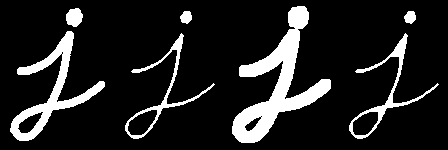

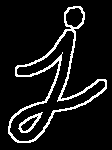

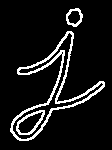

In [407]:
I = cv2.imread('/content/drive/My Drive/Image Processing/j.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(I,kernel,iterations = 1)
dilation = cv2.dilate(I,kernel,iterations = 1)
erosion2 = cv2.erode(dilation,kernel,iterations = 2)
cv2_imshow(np.hstack([I,erosion1,dilation,erosion2]))
cv2_imshow(dilation - I)
cv2_imshow(I - erosion1)

Write a script which reads 'coin.jpg' as input and outputs a new image containing:
Also count the number of coins in each case.

* only the coins touching the boundary of the image
* only the coins which overlap with each other. 
* only non-overlapping coins.


In [0]:
coins = cv2.imread('/content/drive/My Drive/Image Processing/coins.jpg', cv2.IMREAD_GRAYSCALE)
ret,coins = cv2.threshold(coins,127,255,cv2.THRESH_BINARY)
Height = coins.shape[0]
Width = coins.shape[1]
Radius = 9

In [0]:
def getCoinCount(img,r):
  h , w = img.shape[0],img.shape[1]
  flag = np.zeros((h,w))
  count=0
  for row in range(h):
    for col in range(w):
      if(img[row][col] >200):
        if(flag[row][col] == 0):
          count+=1
          # print ((row,col))
          flag[max(0,row-r):min(h,row+r),max(0,col-r):min(h,col+r)] = 1
  return count

#### only the coins touching the boundary of the image

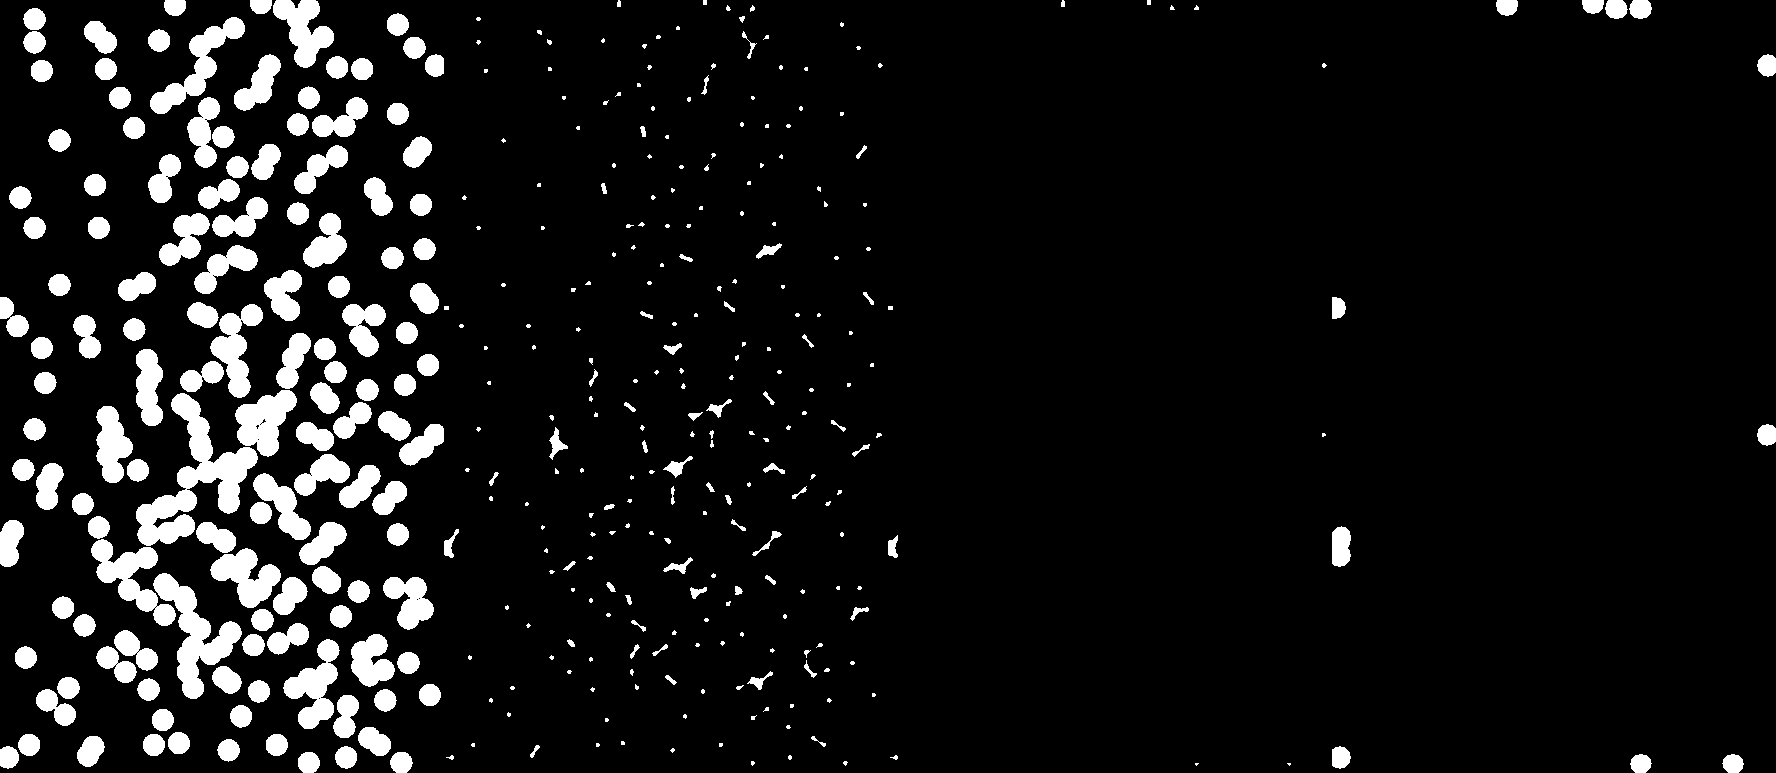

11.0
Boundary coins :  11


In [410]:
struct_ele = morp.disk(Radius)
erode = cv2.erode(coins,struct_ele)
boundary = erode.copy()
boundary[Radius+1:-Radius-1,Radius+1:-Radius-1] = 0
final = cv2.dilate(boundary,struct_ele)
cv2_imshow(np.hstack([coins,erode , boundary, final]))
count=0
for j in range(final.shape[1]):
  if final[0][j] != final[0][j-1]:
    count+=1
count1=0
for j in range(final.shape[0]):
  if final[j][0] != final[j-1][0]:
    count1+=1
count2=0
for j in range(final.shape[1]):
  if final[-1][j] != final[-1][j-1]:
    count2+=1
count3=0
for j in range(final.shape[0]):
  if final[j][-1] != final[j-1][-1]:
    count3+=1
print((count+count1+count2+count3)/2)
bound_cont= cv2.findContours(boundary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
print("Boundary coins : ",len(bound_cont))

#### only the coins which overlap with each other. 
#### only non-overlapping coins.

Non overlapping coins :  62
overlapping coins :  899


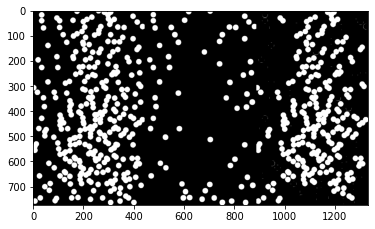

In [411]:
pad = 5
_r = Radius - 2
coin_mask = morp.disk(_r)
overlay = morp.disk(_r + pad)
overlay[pad:-pad, pad:-pad] += coin_mask
kernel = overlay.astype("int") - 1
non_over = cv2.morphologyEx(coins, cv2.MORPH_HITMISS, kernel)
non_over = cv2.dilate(non_over, morp.disk(Radius+2))
plt.imshow(np.hstack([coins, non_over , coins - non_over]),cmap="gray")
# print(getCoinCount(non_over,Radius))
non_cont= cv2.findContours(non_over, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
over_cont= cv2.findContours(coins - non_over, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
print("Non overlapping coins : ",len(non_cont))
print("overlapping coins : ",len(over_cont))

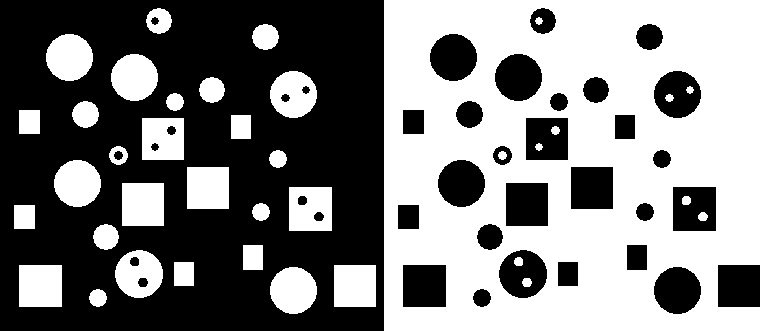

Total Holes 10
Total Squares 11
Number of squares with holes 2


In [412]:
objects = cv2.imread('/content/drive/My Drive/Image Processing/objects.png', cv2.IMREAD_GRAYSCALE)
ret,objects = cv2.threshold(objects,127,255,cv2.THRESH_BINARY)
new = cv2.bitwise_not(objects)
# new = cv2.dilate(objects,np.ones((3,3)),iterations=3)
cv2_imshow(np.hstack([objects, new]))
def getCount(img, s1,s2):
  cnts = cv2.findContours(img, cv2.RETR_LIST, 
                      cv2.CHAIN_APPROX_SIMPLE)[-2] 
  xcnts = [] 
  for cnt in cnts: 
    if s1<cv2.contourArea(cnt) <s2: 
        xcnts.append(cnt)
  return np.array(xcnts)

holes = getCount(new,3,100)
print("Total Holes" , len(holes))
kernel = np.array([[-1,-1,-1],[-1,1,0],[-1,0,0]])
squares = cv2.morphologyEx(objects, cv2.MORPH_HITMISS, kernel)
square_coords=np.nonzero(squares>0)
print("Total Squares" , len(getCount(squares,-1,1)))
count = 0
for i in range(len(square_coords)):
  for hole in holes:
    if np.array([square_coords[0][i],square_coords[1][i]]) in hole:
      count+=1
      break
print("Number of squares with holes",count)

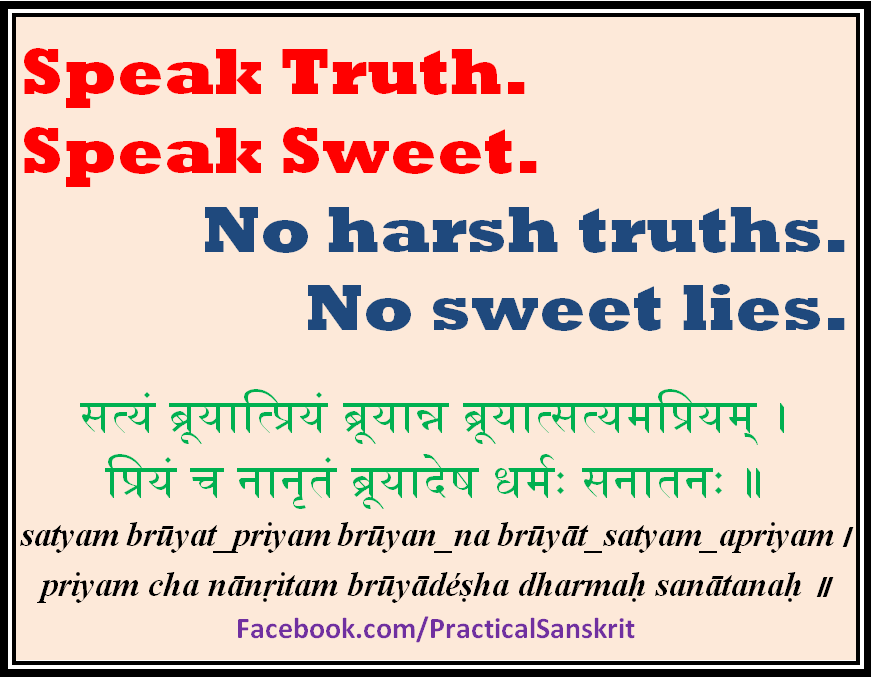

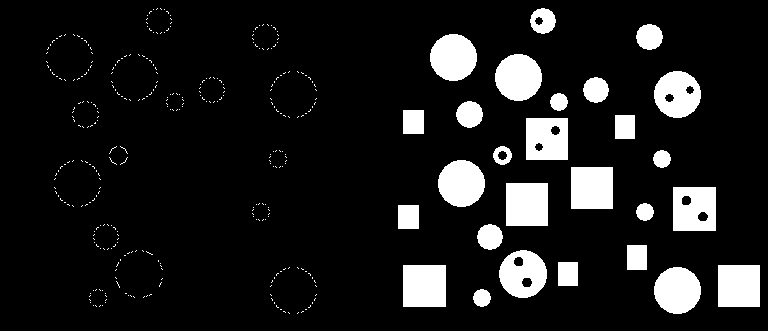

Number of circles 16


In [413]:
objects_dilate = cv2.morphologyEx(objects,cv2.MORPH_CLOSE,np.ones((5,5)))
cv2_imshow(img)
contours= cv2.findContours(objects, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
contour_list = []
final = np.zeros(objects.shape)
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 100) ):
        contour_list.append(contour)
        for point in contour:
          final[point[0][1]][point[0][0]] = 255  
cv2_imshow(np.hstack([final,objects]))
print('Number of circles' , len(contour_list))

In [414]:
image = cv2.imread('/content/drive/My Drive/images/boy_smiling.jpg')
img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
height, width , channels = img_rgb.shape
T = np.float32([[1,0,width/4],[0,1,height/4]])
print(T)

[[  1.    0.  100. ]
 [  0.    1.   98.5]]


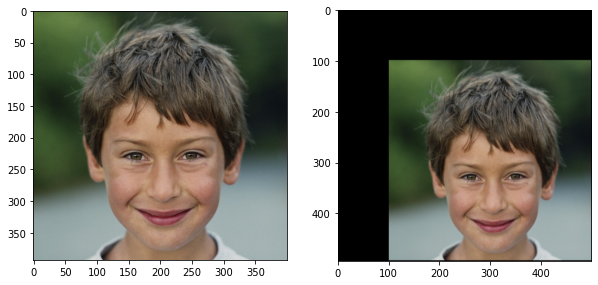

In [415]:
img_translate = cv2.warpAffine(img_rgb, T, (width+100,height+100))
fig , (ax1,ax2) = plt.subplots(1,2,figsize=[10,10])
ax1.imshow(img_rgb)
ax2.imshow(img_translate)
plt.show()

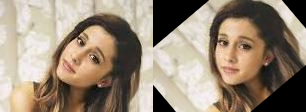

In [416]:
from math import atan2, degrees, atan
img = cv2.imread('/content/drive/My Drive/images/tilted_face.jpg')
left_eye =  (77, 37)
right_eye = (116, 70)
hor=np.array([right_eye[0], left_eye[1]]) - left_eye
theta = degrees(atan2((right_eye[1] - left_eye[1]),(right_eye[0] - left_eye[0])) - atan2(hor[1],hor[0])) 
if theta < 0:
  theta = theta+360
M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),theta,1)
straight = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2_imshow(np.hstack([img,straight]))

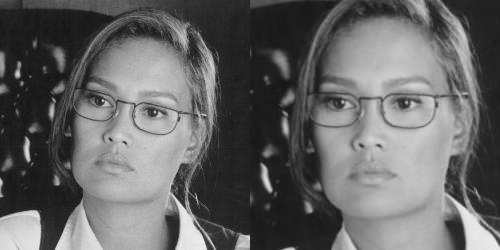

In [417]:
img = cv2.imread('/content/drive/My Drive/Image Processing/face.jpg')
left_eye =  (100,100)
right_eye = (152, 111)
hor=np.array([right_eye[0], left_eye[1]]) - left_eye
theta = degrees(atan2((right_eye[1] - left_eye[1]),(right_eye[0] - left_eye[0])) - atan2(hor[1],hor[0])) 
if theta < 0:
  theta = theta+360
M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),theta,1.2)
straight = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2_imshow(np.hstack([img,straight])) 

In [0]:
coke = cv2.cvtColor(cv2.imread('/content/drive/My Drive/images/coca.jpg'),cv2.COLOR_BGR2RGB)
stadium = cv2.cvtColor(cv2.imread('/content/drive/My Drive/images/stadium.jpg'),cv2.COLOR_BGR2RGB)

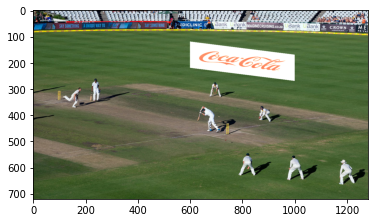

In [419]:
pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords 
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]])
H , status = cv2.findHomography(pts1,pts2)
img_homo = cv2.warpPerspective(coke,H,(stadium.shape[1],stadium.shape[0]))
# fig , (ax1,ax2) = plt.subplots(1,2,figsize=[10,10])
# ax1.imshow(coke)
# ax2.imshow(img_homo)
# plt.show()
final=cv2.add(stadium,img_homo)
plt.imshow(final)

25
28


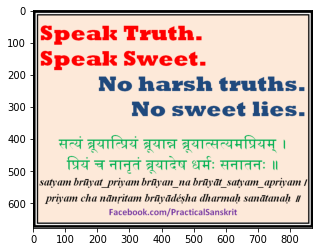

In [420]:
img = cv2.imread('/content/drive/My Drive/Image Processing/text2.png',cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,::-1])
class DSU:
    def __init__(self, n):
        self.rank = np.array([1] * n)
        self.parent = np.array(list(range(n)))

    def find(self, i):
        if self.parent[i] != i:
            self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        x = self.find(i)
        y = self.find(j)

        if x == y:
            return

        if self.rank[x] < self.rank[y]:
            self.parent[x] = y
        elif self.rank[x] > self.rank[y]:
            self.parent[y] = x
        else:
            self.parent[y] = x
            self.rank[x] += 1
def count(img, col):
    id = 1
    labels = np.zeros(img.shape[:2]).astype("uint")
    nx, ny = img.shape[:2]

    for i in range(nx):
        for j in range(ny):
            if (img[i, j] == col).all():
                if i > 0 and labels[i-1, j] != 0:
                    labels[i, j] = labels[i-1, j]
                elif j < ny - 1 and labels[i, j+1] != 0:
                    labels[i, j] = labels[i, j+1]
                elif i < nx - 1 and labels[i+1, j] != 0:
                    labels[i, j] = labels[i+1, j]
                elif j > 0 and labels[i, j-1] != 0:
                    labels[i, j] = labels[i, j-1]
                else:
                    labels[i, j] = id
                    id += 1

    dsu = DSU(id+1)
    
    for i in range(nx):
        for j in range(ny):
            if labels[i, j] != 0:
                if i > 0 and labels[i-1, j] != labels[i,j] and labels[i-1,j] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i-1, j]]))
                elif j < ny - 1 and labels[i, j+1] != labels[i,j] and labels[i,j+1] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i, j+1]]))
                elif i < nx - 1 and labels[i+1, j] != labels[i,j] and labels[i+1,j] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i+1, j]]))
                elif j > 0 and labels[i, j-1] != labels[i, j] and labels[i, j-1] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i, j-1]]))

    parents = []
    for i in range(1,id+1):
        parents.append(dsu.find(i))

    return len(np.unique(parents))
print(count(img,[0,0,255]))
print(count(img,[125,73,31]))

In [0]:
rose = cv2.cvtColor(cv2.imread('/content/drive/My Drive/Image Processing/rose.jpeg',cv2.COLOR_BGR2RGB),cv2.COLOR_BGR2RGB) 
chroma = cv2.cvtColor(cv2.imread('/content/drive/My Drive/Image Processing/chroma_img.jpg',cv2.COLOR_BGR2RGB),cv2.COLOR_BGR2RGB) 
lena = cv2.cvtColor(cv2.imread('/content/drive/My Drive/Image Processing/lena.png',cv2.COLOR_BGR2RGB),cv2.COLOR_BGR2RGB) 
stadium = cv2.cvtColor(cv2.imread('/content/drive/My Drive/images/stadium.jpg',cv2.COLOR_BGR2RGB),cv2.COLOR_BGR2RGB)
# rose = cv2.imread('/content/drive/My Drive/Image Processing/rose.jpeg')
def chroma_keying(fg,bg):
  mask = cv2.inRange(fg,np.array([0,100,0]),np.array([120,255,100]))
  fg[mask!=0] = [0,0,0]
  crop_background = bg[-fg.shape[0]:,-fg.shape[1]:]
  crop_background[fg != 0] = 0
  crop_background += fg
  final_image = np.copy(bg)
  final_image[-fg.shape[0]:,-fg.shape[1]:] = crop_background
  xstart=bg.shape[0] - fg.shape[0]
  ystart=bg.shape[1] - fg.shape[1]
  for i in range(fg.shape[0]):
    for j in range(fg.shape[1]):
      if(fg[i][j][0]==0&fg[i][j][1]==0&fg[i][j][2]==0):
        pass
      else:
        final_image[xstart+i][ystart+j]=fg[i][j] 
  return final_image

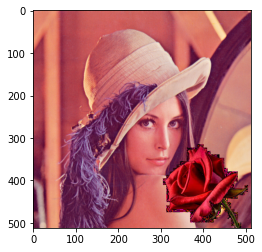

In [422]:
plt.imshow(chroma_keying(rose,lena))

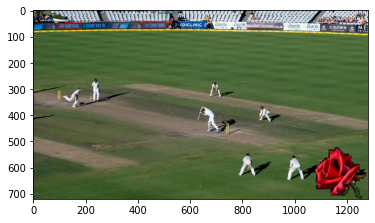

In [423]:
plt.imshow(chroma_keying(rose,stadium))

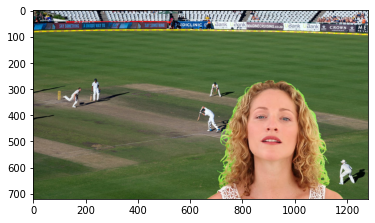

In [424]:
stadium = cv2.cvtColor(cv2.imread('/content/drive/My Drive/images/stadium.jpg',cv2.COLOR_BGR2RGB),cv2.COLOR_BGR2RGB)
plt.imshow(chroma_keying(chroma,stadium))